In [1]:
import pandas as pd
import matplotlib as plt
data=pd.read_csv(r"/content/adult 3.csv")
data.head(5)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
print(f"Total number of columns and rows={data.shape}")

Total number of columns and rows=(48842, 15)


In [3]:
print("Sum of null values to preprocess=")
data.isna().sum()

Sum of null values to preprocess=


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [4]:
print(data.age.value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


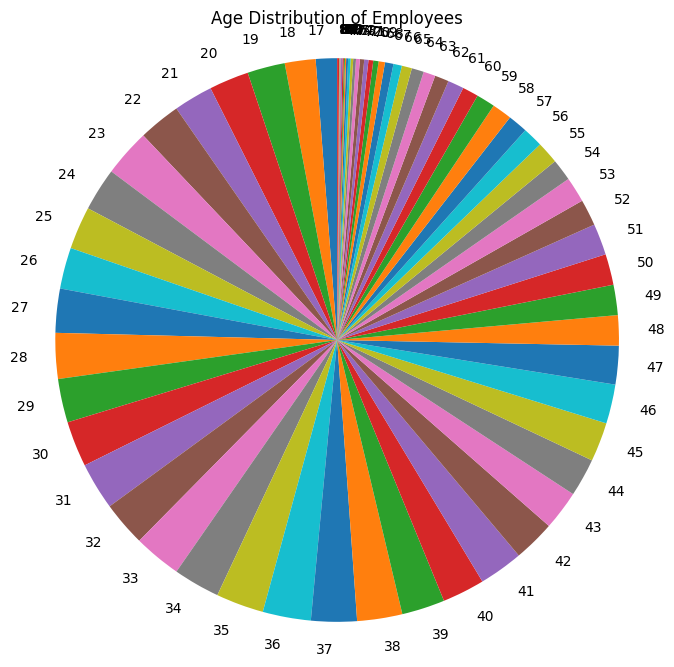

In [5]:
age_graph=data['age'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(age_graph, labels=age_graph.index,  startangle=90)
plt.title('Age Distribution of Employees')
plt.axis('equal')
plt.show()

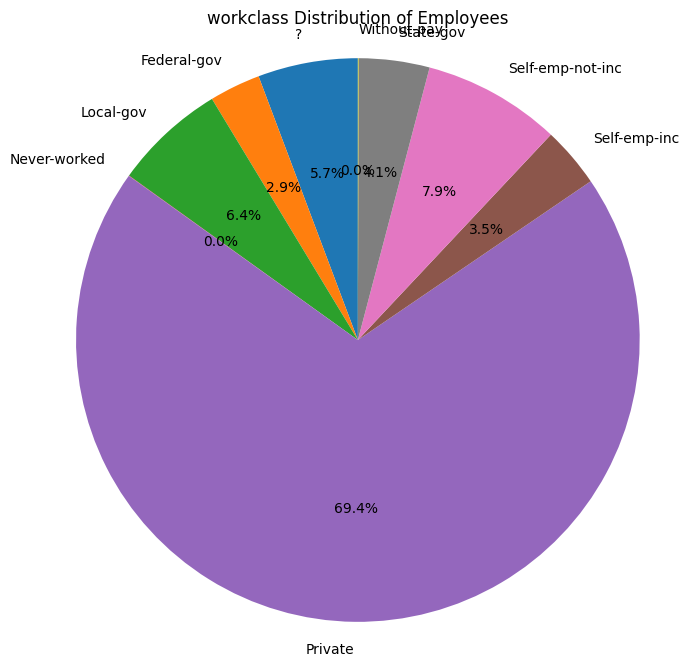

In [6]:
workclass_graph=data['workclass'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(workclass_graph, labels=workclass_graph.index,autopct='%1.1f%%',  startangle=90)
plt.title('workclass Distribution of Employees')
plt.axis('equal')
plt.show()

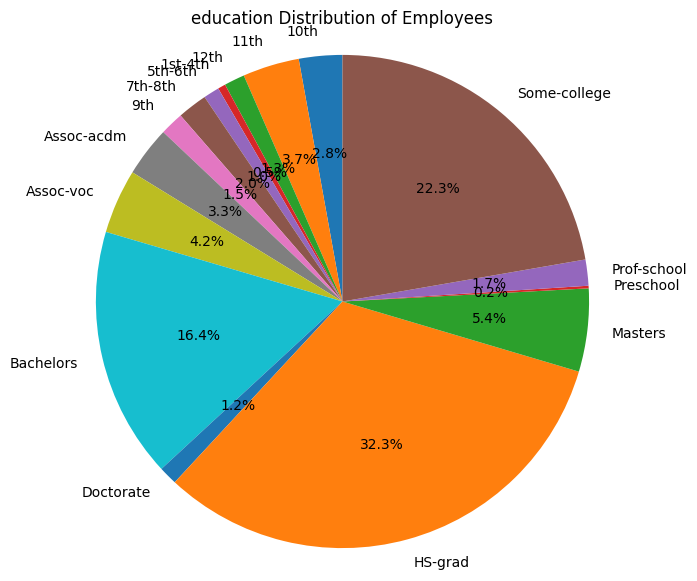

In [32]:
education_graph=data['education'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.pie(education_graph, labels=education_graph.index,autopct='%1.1f%%',  startangle=90)
plt.title('education Distribution of Employees')
plt.axis('equal')
plt.show()

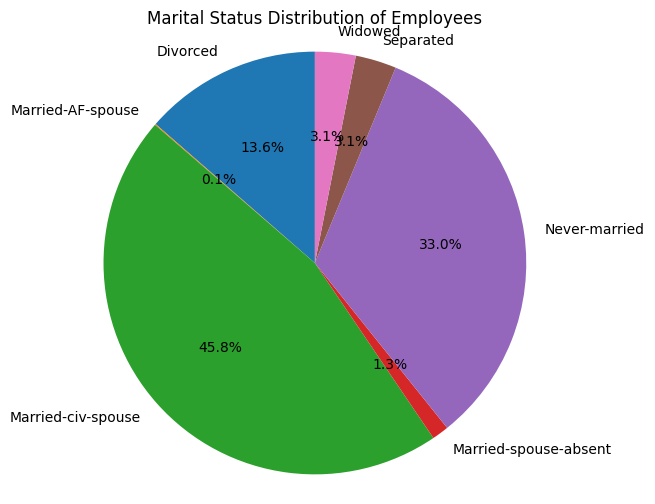

In [8]:
marital_status_graph=data['marital-status'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(marital_status_graph, labels=marital_status_graph.index,autopct='%1.1f%%',  startangle=90)
plt.title('Marital Status Distribution of Employees')
plt.axis('equal')
plt.show()

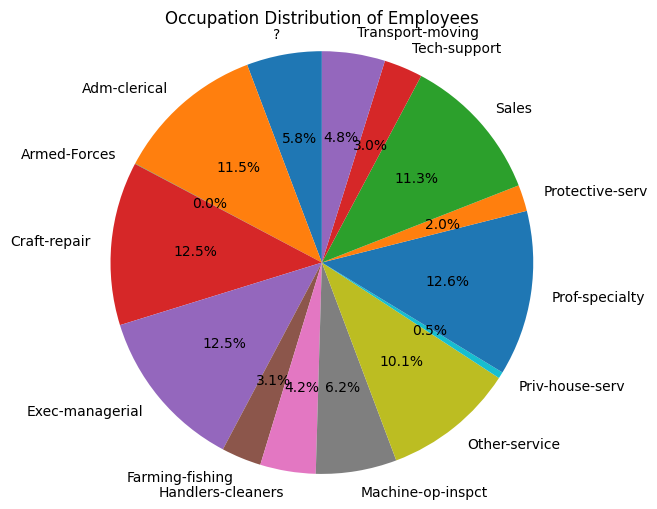

In [9]:
occupation_graph=data['occupation'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(occupation_graph, labels=occupation_graph.index,autopct='%1.1f%%',  startangle=90)
plt.title("Occupation Distribution of Employees")
plt.axis('equal')
plt.show()

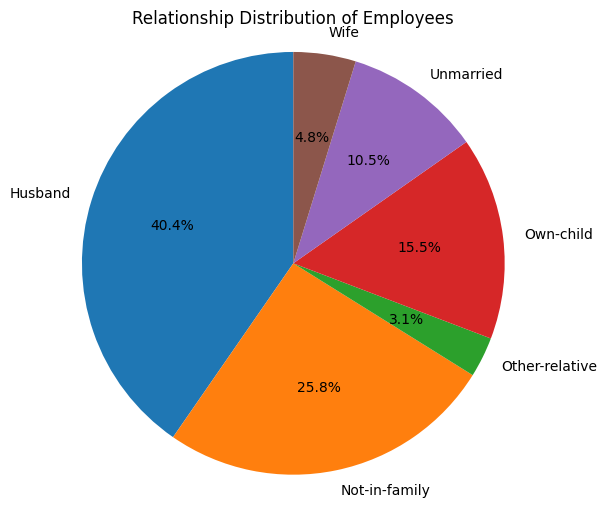

In [ ]:
relationship_graph=data['relationship'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(relationship_graph, labels=relationship_graph.index,autopct='%1.1f%%',  startangle=90)
plt.title('Relationship Distribution of Employees')
plt.axis('equal')  
plt.show()

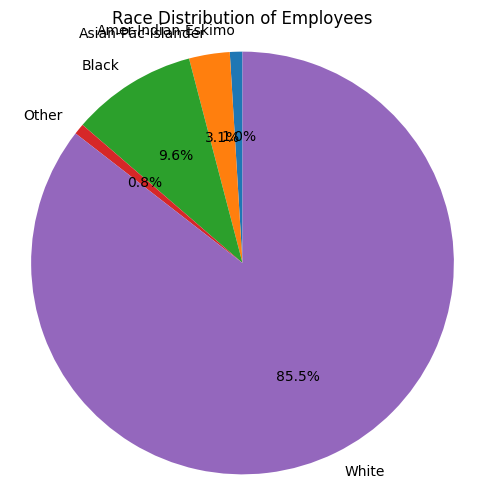

In [ ]:
race_graph=data['race'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(race_graph, labels=race_graph.index,autopct='%1.1f%%',  startangle=90)
plt.title('Race Distribution of Employees')
plt.axis('equal')  
plt.show()

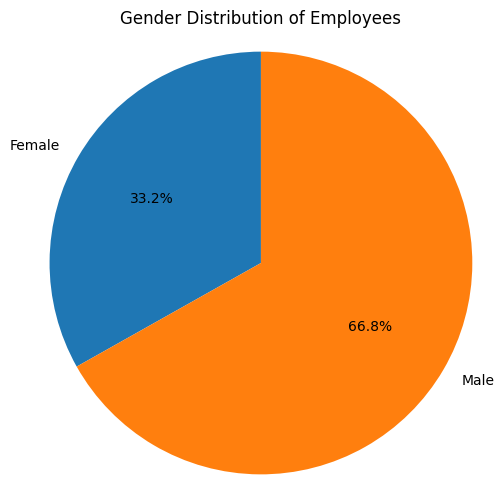

In [ ]:
gender_graph=data['gender'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(gender_graph, labels=gender_graph.index,autopct='%1.1f%%',  startangle=90)
plt.title('Gender Distribution of Employees')
plt.axis('equal') 
plt.show()

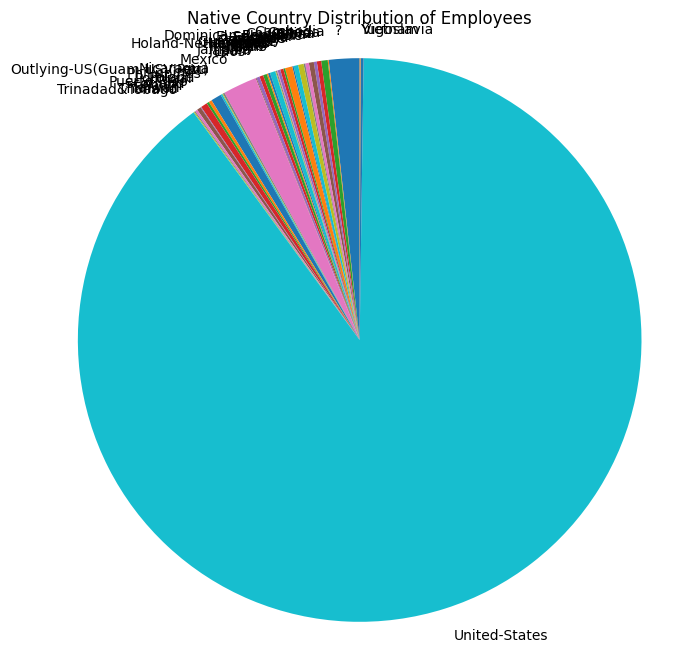

In [ ]:
country_graph=data['native-country'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(country_graph, labels=country_graph.index, startangle=90)
plt.title('Native Country Distribution of Employees')
plt.axis('equal') 
plt.show()

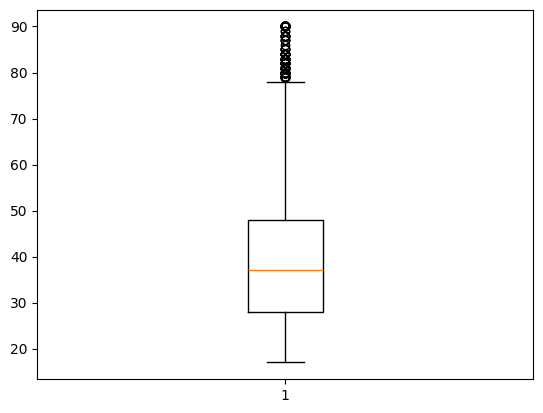

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

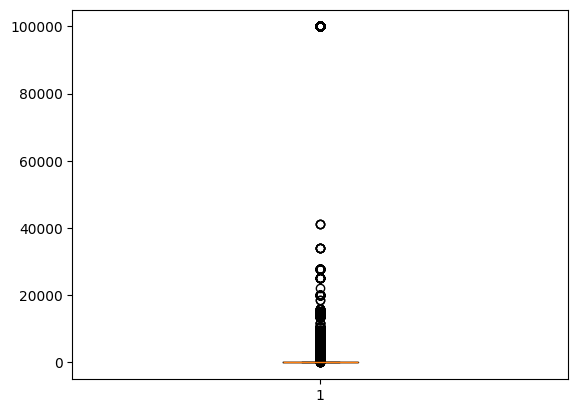

In [15]:
plt.boxplot(data['capital-gain'])
plt.show()

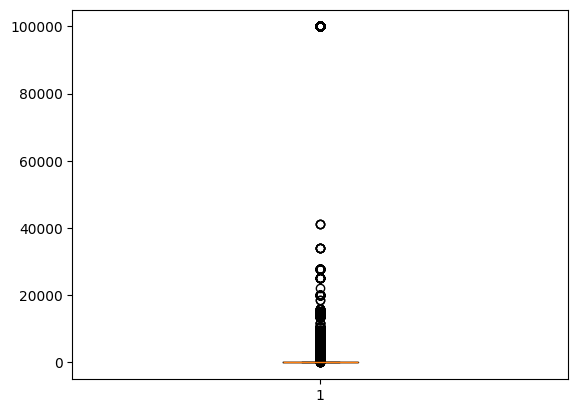

In [16]:
plt.boxplot(data['capital-gain'])
plt.show()

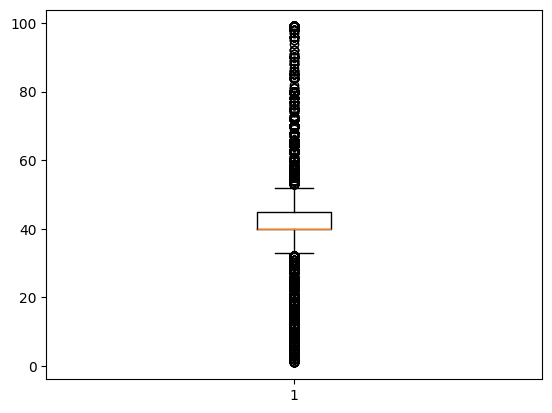

In [17]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [18]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
data=pd.read_csv(r"/content/adult 3.csv")
x=data.drop(columns=['income'])
y=data['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)

categorical_cols=x_train.select_dtypes(include='object').columns
numeric_cols=x_train.select_dtypes(include=['int64','float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)
models={
    "LogisticRegression":LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "SVM":SVC(),
    "GradientBoosting":GradientBoostingClassifier()

}
results={}

for name,model in models.items():
    pipe=Pipeline([
        ('preprocessor',preprocessor),
        ('model',model)
    ])
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    results[name]=accuracy
    print(f"{name} Accuracy:{accuracy:.4f}")
    print(classification_report(y_test,y_pred))

LogisticRegression Accuracy:0.8567
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7431
        >50K       0.74      0.61      0.67      2338

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

RandomForest Accuracy:0.8556
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7431
        >50K       0.73      0.63      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769

SVM Accuracy:0.8618
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7431
        >50K       0.77      0.60      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79 

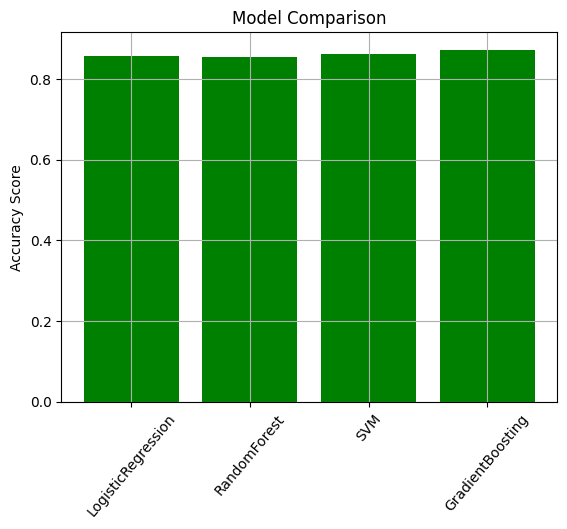

In [20]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='green')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,classification_report

data=pd.read_csv(r"/content/adult 3.csv")

x=data.drop(columns=["income"])
y=data["income"]

le=LabelEncoder()
y=le.fit_transform(y)

categorical_cols=x.select_dtypes(include="object").columns.tolist()
numeric_cols=x.select_dtypes(include=["int64", "float64"]).columns.tolist()


preprocess=ColumnTransformer([
    ('num',StandardScaler(),numeric_cols),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_cols)
])

xgb=XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,

)


pipeline = Pipeline([
    ('preprocessor', preprocess),
    ('classifier', xgb)
])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)


pipeline.fit(x_train,y_train)


y_pred = pipeline.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8759340771829256
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7431
           1       0.80      0.65      0.71      2338

    accuracy                           0.88      9769
   macro avg       0.85      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,classification_report
import joblib

data=pd.read_csv(r"/content/adult 3.csv")

x=data.drop(columns=["income"])
y=data["income"]

le=LabelEncoder()
y=le.fit_transform(y)

categorical_cols=x.select_dtypes(include="object").columns.tolist()
numeric_cols=x.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocess=ColumnTransformer([
    ('num',StandardScaler(),numeric_cols),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_cols)
])

xgb=XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
lr=LogisticRegression(max_iter=1000)

stack=StackingClassifier(
    estimators=[('xgb',xgb),('lr',lr)],
    final_estimator=LogisticRegression(),
    passthrough=False,
    cv=5,
    n_jobs=-1
)

model_pipeline=Pipeline([
    ('preprocess',preprocess),
    ('stack',stack)
])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

model=model_pipeline.fit(x_train,y_train)
y_pred = model_pipeline.predict(x_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(model, 'model.pkl')
print()
print("Model saved in model.pkl")

Stacking Accuracy: 0.8752175248234211
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      7431
           1       0.79      0.65      0.71      2338

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769


Model saved in model.pkl


In [ ]:
!pip install streamlit pyngrok

In [29]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
model=joblib.load("model.pkl")
st.set_page_config(page_title="SENSE YOUR SALARY",page_icon="💰",layout="wide")
st.title("SENSE YOUR SALARY")

st.markdown("Predict whether an employee earns >50 or <50 ")

st.sidebar.header("input employee details")

st.sidebar.subheader("Demographics")
age=st.sidebar.slider("Age",18,65,30)
workclass = st.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov",
    "State-gov", "Without-pay", "Never-worked"
])
fnlwgt = st.number_input("fnlwgt", min_value=10000, max_value=1000000, value=50000)
educational_num = st.slider("Education-Num", 1, 16, 10)
education=st.sidebar.selectbox("Education level",[
    "Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm",
    "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", "Doctorate",
    "5th-6th", "Preschool"
])

occupation=st.sidebar.selectbox("Job role",[
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty",
    "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing",
    "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"
])

hours_per_week=st.sidebar.slider("Hours per week",1,99,40)
experience=st.sidebar.slider("Years of experience:",0,40,5)

marital_status = st.selectbox("Marital Status", [
    "Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", "Married-spouse-absent"
])
relationship = st.selectbox("Relationship", [
    "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
])
race = st.selectbox("Race", [
    "White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"
])
gender = st.selectbox("Sex", ["Male", "Female"])
capital_gain = st.number_input("Capital Gain", min_value=0, max_value=99999, value=0)
capital_loss = st.number_input("Capital Loss", min_value=0, max_value=99999, value=0)
hours_per_week = st.slider("Hours per week", 1, 99, 40)
native_country = st.selectbox("Native Country", [
    "United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany",
    "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", "Cuba",
    "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico",
    "Portugal", "Ireland", "France", "Dominican-Republic", "Laos", "Ecuador", "Taiwan",
    "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland", "Thailand",
    "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"
])

input_df = pd.DataFrame([{
    "age": age,
    "workclass": workclass,
    "fnlwgt": fnlwgt,
    "education": education,
    "educational-num": educational_num,
    "marital-status": marital_status,
    "occupation": occupation,
    "relationship": relationship,
    "race": race,
    "gender": gender,
    "capital-gain": capital_gain,
    "capital-loss": capital_loss,
    "hours-per-week": hours_per_week,
    "native-country": native_country
}])

st.write("input data")
st.write(input_df)

col1, col2 = st.columns(2)

with col1:
    st.subheader("📥 Input Data")
    st.dataframe(input_df)

with col2:
    if st.button("🔎 Predict"):
        pred = model.predict(input_df)
        label = (
            "💰 50K+ – Rocking in your career!" if pred[0] == 1
            else "🔸<50K– Salary will grow with experience!"
        )
        st.markdown("### ✅ Prediction")
        st.success(label)
        st.markdown(f"<div style='font-size:20px; color:green;'><b>{label}</b></div>", unsafe_allow_html=True)

st.markdown("---")
st.markdown("batch prediction")

uploaded_file=st.file_uploader("upload csv file")

if uploaded_file is not None:
  batch_data=pd.read_csv(uploaded_file)
  st.write("batch data:")
  st.write("🔍 Preview of Uploaded Data:")
  st.write(batch_data.head())
  batch_preds=model.predict(batch_data)
  batch_data['predictedclass']=batch_preds
  st.write("batch predictions:")
  st.write(batch_data.head())
  csv=batch_data.to_csv(index=False).encode('utf-8')
  st.download_button(
      label="download csv",
      data=csv,
      file_name="predictions.csv",
      mime="text/csv"
  )


Overwriting app.py


In [26]:
!ngrok authtoken 300267CBaiFuHx7B1FKD2wSunaf_3FX8mWCx8QNYCuBXrzYk8

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [30]:
import os
import threading

def run_streamlit():
  os.system("streamlit run app.py &")

thread=threading.Thread(target=run_streamlit).start()

In [31]:
from pyngrok import ngrok
import time

time.sleep(5) # Add a small delay to ensure the kill command takes effect

# Open HTTP tunnel on port 8501
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)

# Run the app


Streamlit app URL: NgrokTunnel: "https://9ab605c517f3.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
from pyngrok import ngrok
ngrok.kill()

In [ ]:
!pkill ngrok
